# ENGN 2770: Atomistic Reaction Engineering

## Computational Tutorial

This is the pdf version. The interactive version (which includes necessary environment files) can be accessed from using the link provided: 

https://mybinder.org/v2/gh/bjkreitz/ase-tutorial-engn2770/main

(Note: This can take a minute or two to load and download required environment files)

Once you open the link, you can download the "engn2770_computational_tutorial.ipynb" and save it on your local computer. 

Note, you will need jupyter notebook along with other necessary packages if you wish to use it on your local machine(ASE, python, matplotlib, numpy). 

## A) Intro to linux bash commands (https://files.fosswire.com/2007/08/fwunixref.pdf)

In [1]:
from IPython.display import Image

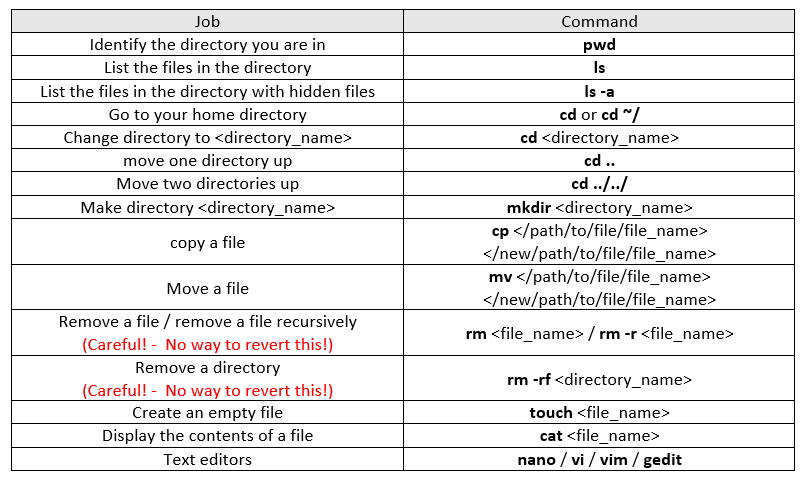

In [3]:
Image(filename='extras/linux_commands.PNG')

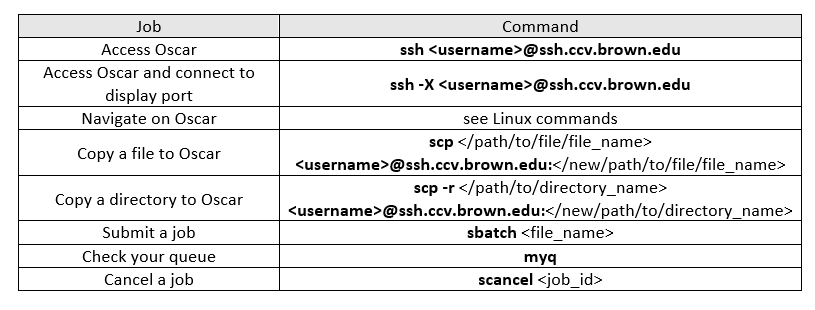

In [4]:
Image(filename='extras/ccv_commands.PNG')

## B) Python 

### Basic arithmetic

In [4]:
# Basic arithmetic
a = 2.
b = 3.

print(a + b)

5.0


In [5]:
# square of a number
sq = a**2
print(sq)

4.0


In [6]:
# division & % 
print(4./2)

# remainder of a division
print(15.%8)
print(8.%2) # If this is 0, then 8 is divisible by 2!

2.0
7.0
0.0


### Functions

In [7]:
# functions

# define add function
def add(a,b):
    return a+b

# define power function
def power(a,pow=2):
    return a**pow

# call add function
add_result = add(2.,3.)
print(add_result)

# call power function
power_result = power(5.,3)
print(power_result)

5.0
125.0


In [8]:
sum_result = sum((2.,2.))
print(sum_result)

pow_result = pow(5.,4)
print(pow_result)

4.0
625.0


### numpy, list & arrays

In [9]:
# using numpy (Numerical Python)
import numpy as np

sum_result = np.sum((2.,-3.))
print(sum_result)

power_result = np.power(2.,8)
print(power_result)

-1.0
256.0


In [10]:
# list 
things = ['a',7]

for thing in things:
    print(thing)

a
7


In [11]:
# Basic list commands

_list = [1,2,3,4]

#_list.append(5)
#_list.pop(2)
#_list.reverse()

print(_list)

[1, 2, 3, 4]


In [12]:
import numpy as np

# return evenly spaced numbers over a specified interval

a = np.linspace(1,12,12)
print(a)
print(a.shape)

# convert a 1D array into 2D 
a.reshape(3,4)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
(12,)


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

### For loop & conditional statements

In [13]:
# for loops
for element in range(5):
    print(element, element**2)

0 0
1 1
2 4
3 9
4 16


In [14]:
# For loops with conditional statements

dice = [1,2,3,4,5,6]

type_list = []

for roll in dice:
    if roll % 2 == 0: 
        type_list.append('even')
    else:
        type_list.append('odd')

print(type_list)

['odd', 'even', 'odd', 'even', 'odd', 'even']


In [15]:
num = np.linspace(0,10,11)
print(num)

doubled_list = []

for element in num:
    if element > 5:
        doubled_list.append(element*2)

print(doubled_list)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12.0, 14.0, 16.0, 18.0, 20.0]


In [16]:
# For loop with conditional statement in one line

num = np.linspace(0,10,11)
print(num)

doubled = [element * 2 for element in num if element>5]
print(doubled)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12.0, 14.0, 16.0, 18.0, 20.0]


In [17]:
long_words = ['platinum', 'hi', 'carbon', 'welcome', 'hydrogen', 'neptune', 'covid', 'python']

# checks and stores into new list based on length of a word
short_words = [word for word in long_words if len(word) < 6]

short_words

['hi', 'covid']

## C) Atomic Simutlation Environment 

In [18]:
# Some basic packages we will need throughout

import os
import numpy as np

import ase
from ase.parallel import paropen
from ase.io import read, write
from ase.visualize import view

# Plotting and image visualizing in Jupyter Notebook
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

# Module 1: Atom / Atoms

In [19]:
# import the module (use tab tab for auto-completion)
from ase import Atom, Atoms

In [20]:
# use ? to know more
#atom = Atom?

In [21]:
atom = Atom('O')
atom.mass = 16
atom.charge = -2 
atom.position = (0,2,3)
#atom.symbol
#atom.x
#atom.y

In [22]:
# use ? to know more
#Atoms? 

In [23]:
d = 1.104 # N2 bondlength

# The following three are equivalent
N2 = Atoms('N2', [(0, 0, 0), (0, 0, d)])
N2 = Atoms(numbers=[7, 7], positions=[(0, 0, 0), (0, 0, d)])
N2 = Atoms([Atom('N', (0, 0, 0)), Atom('N', (0, 0, d))])

# to save and view a snapshot
write('extras/n2.png', N2, rotation='-80y')
Image(filename='extras/n2.png')

# to have a 3D view in notebook
#view(N2, viewer='x3d')


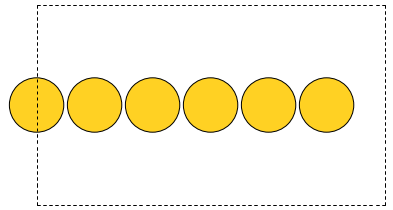

In [24]:
d = 2.9
L = 10.0

# construct a Au wire
wire = Atoms('Au',
             positions=[[0, L / 2., L / 2.]],
             cell=[d, L, L],
             pbc=[1, 0, 0])

wire.get_chemical_symbols()

# to save and view a snapshot
write('extras/wire.png', wire * (6,1,1))
Image(filename='extras/wire.png') 


#view(wire*(6,1,1), viewer='x3d')

#view(wire*(6,1,1))

# Module 2: Build (molecule, bulk, surfaces)

['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']
C2H6O
[[ 1.168181 -0.400382  0.      ]
 [ 0.        0.559462  0.      ]
 [-1.190083 -0.227669  0.      ]
 [-1.946623  0.381525  0.      ]
 [ 0.042557  1.207508  0.886933]
 [ 0.042557  1.207508 -0.886933]
 [ 2.115891  0.1448    0.      ]
 [ 1.128599 -1.037234  0.885881]
 [ 1.128599 -1.037234 -0.885881]]


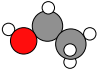

In [25]:
from ase.build import molecule

m = molecule('CH3CH2OH')
print(m.get_chemical_symbols())
print(m.get_chemical_formula())
print(m.get_positions())

# to save and view a snapshot
write('extras/ethanol.png', m, rotation='-20x')
Image(filename='extras/ethanol.png',width=150)

#view(m, viewer='x3d')

#view(m)

# Optimize lattice constant

Cell([3.6, 3.6, 3.6])


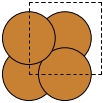

In [26]:
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.io import Trajectory

a0 = 3.6
cu = bulk('Cu', 'fcc', a=a0, cubic=True)

print(cu.get_cell())

# to save and view a snapshot
write('extras/cu.png', cu)
Image(filename='extras/cu.png',width=150)

#view(cu, viewer='x3d')

#view(cu)

In [27]:
# create an empty list to store energy
energy_list = []

# start with a good guess
# and create a list with fluctuations in a.

a0 = 3.6
a_list = a0 + np.linspace(-0.2, 0.2, 101)

# For loop to use each and every value of a
# and calculate & store the potential energy

for a in a_list:
    cu = bulk('Cu', 'fcc', a=a, cubic=True)
    cu.set_calculator(EMT())
    e = cu.get_potential_energy()
    energy_list.append(e)
    

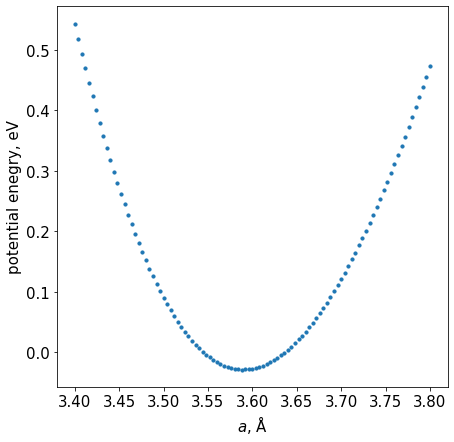

In [28]:
# plotting using matplotlib (https://matplotlib.org/)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(a_list, energy_list, marker='o', s=10)
plt.xlabel('$a$, $\mathrm{\AA}$', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('potential enegry, eV', fontsize=15)
plt.yticks(fontsize=15)
fig.savefig('extras/lattice_constant.png')
plt.show()

In [29]:
# index corresponding to the lowest energy

index = energy_list.index(min(energy_list))
lc = a_list[index]
print('lattice constant:%0.3f'%lc)

lattice constant:3.588


# Module 3:  Surface, Constraints

In [30]:
from ase.build import fcc111
from ase.constraints import FixAtoms

In [31]:
#fcc111? 

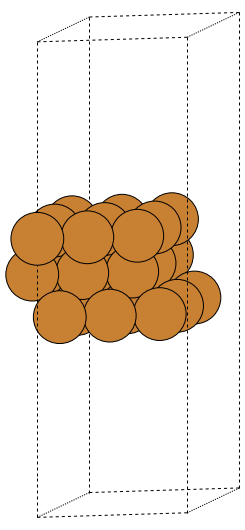

In [32]:
# Create a slab using build
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

# Use of constraints, here, Fix the bottom most layer
indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

# Note that the constraint is not visible through 
# the following method

write('extras/cu_slab.png', slab, rotation='10z,-80x')
Image(filename='extras/cu_slab.png') 

#view(slab, viewer='x3d')
#view(slab)

# Module 4: Add an adsorbate 

##### method 1

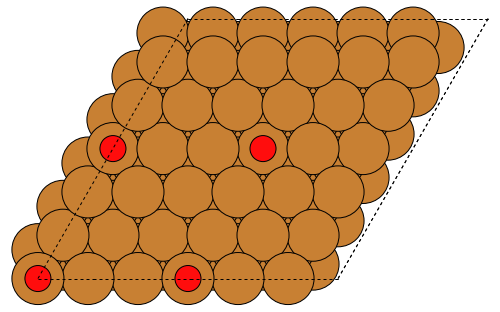

In [33]:
from ase.build import add_adsorbate

# create a slab
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

# create an atom and use add_adsorbate to add it to the slab
adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'ontop')

write('extras/slab_with_adsorbate.png', slab * (2, 2, 1))
Image(filename='extras/slab_with_adsorbate.png') 

#view(slab, viewer='x3d')
#view(slab)

##### method 2

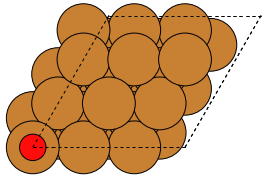

In [34]:
a = 3.558

# create a slab
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

# use the slab atom position to add it to the slab
adsorbate = Atom('O')
adsorbate.position = slab[18].position + (0,0,2)

slab_with_add = slab + adsorbate

write('extras/slab_with_adsorbate.png', slab_with_add)
Image(filename='extras/slab_with_adsorbate.png') 

#view(slab_with_add, viewer='x3d')
#view(slab_with_add)

# Module 5: Structure optimization using EMT

In [35]:
from ase.constraints import FixAtoms
from ase.build import fcc111, add_adsorbate
from ase.calculators.emt import EMT
from ase.optimize import BFGS

# Construct a slab with optimized lattice constant
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
# Periodic boundary conditions
slab.set_pbc((1,1,0))

# Construct & add an adosorbate
adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'ontop')

# Fix atoms
indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

# Calculator
calc = EMT()
slab.set_calculator(calc)

if os.path.exists('qn.log'):
    os.remove('qn.log')

# Optimization
opt = BFGS(slab, logfile='qn.log', trajectory='qn.traj')
opt.run(fmax=0.01)

True

In [36]:
#relaxed_slab = read('qn.traj')
#view(relaxed_slab)

In [37]:
myfile = open("qn.log",'r')
txt = myfile.read()
print(txt)

      Step     Time          Energy         fmax
BFGS:    0 09:20:44        6.520552        0.9096
BFGS:    1 09:20:44        6.505566        0.4225
BFGS:    2 09:20:44        6.501307        0.0559
BFGS:    3 09:20:44        6.501107        0.0437
BFGS:    4 09:20:44        6.500731        0.0845
BFGS:    5 09:20:44        6.500402        0.0943
BFGS:    6 09:20:44        6.500170        0.0693
BFGS:    7 09:20:45        6.500026        0.0385
BFGS:    8 09:20:45        6.499856        0.0668
BFGS:    9 09:20:45        6.499623        0.0791
BFGS:   10 09:20:45        6.499416        0.0562
BFGS:   11 09:20:45        6.499321        0.0183
BFGS:   12 09:20:45        6.499287        0.0128
BFGS:   13 09:20:45        6.499261        0.0155
BFGS:   14 09:20:45        6.499236        0.0165
BFGS:   15 09:20:46        6.499223        0.0082



In [38]:
from ase.constraints import FixAtoms
from ase.build import fcc111, add_adsorbate
from ase.calculators.emt import EMT
from ase.optimize import BFGS

# Construct a slab with optimized lattice constant
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
# periodic boundary condition 
slab.set_pbc((1,1,0))

# Construct & add an adosorbate
adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'hcp')

# Fix atoms constraint to fix the last atomic layer
indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

# Calculator
calc = EMT()
slab.set_calculator(calc)

if os.path.exists('qn.log'):
    os.remove('qn.log')

# Optimization
opt = BFGS(slab, logfile='qn.log', trajectory='qn.traj')
opt.run(fmax=0.01)

True

In [39]:
myfile = open("qn.log",'r')
txt = myfile.read()
print(txt)

      Step     Time          Energy         fmax
BFGS:    0 09:20:46        6.570523        1.7805
BFGS:    1 09:20:46        6.508532        1.5692
BFGS:    2 09:20:46        6.388970        0.6331
BFGS:    3 09:20:46        6.368169        0.3576
BFGS:    4 09:20:46        6.363440        0.2807
BFGS:    5 09:20:46        6.346981        0.1420
BFGS:    6 09:20:46        6.345193        0.1026
BFGS:    7 09:20:47        6.343991        0.0898
BFGS:    8 09:20:47        6.342511        0.0919
BFGS:    9 09:20:47        6.340466        0.0910
BFGS:   10 09:20:47        6.339097        0.1304
BFGS:   11 09:20:47        6.338357        0.1316
BFGS:   12 09:20:47        6.337813        0.1097
BFGS:   13 09:20:47        6.337098        0.0630
BFGS:   14 09:20:47        6.336492        0.0408
BFGS:   15 09:20:47        6.336258        0.0134
BFGS:   16 09:20:48        6.336218        0.0105
BFGS:   17 09:20:48        6.336205        0.0090



# Module 6: Calculate Barriers using nudged elastic band (NEB)

In [43]:
#!/usr/bin/env python3

import ase 
from ase.io import read, write
from ase import Atom
from ase.build import fcc111
from ase.constraints import FixAtoms
from ase.neb import NEB
from ase.optimize import BFGS
from ase.calculators.emt import EMT

# Create a bare slab
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

slab.set_calculator(EMT())

opt = BFGS(slab, logfile='bare_slab.log', trajectory='bare_slab.traj')
opt.run(fmax=0.01)

# create an adsorbate
adsorbate = Atom('O')

#######################################
###### SLAB 1: Cu with O in fcc (position 1) #######
#######################################

initial = slab + adsorbate
initial[-1].position = initial[18].position + (1.3,0.8,1)

initial.set_calculator(EMT())
opt = BFGS(initial, logfile='initial.log', trajectory='initial.traj')
opt.run(fmax=0.01)


####################################################
###### SLAB 1: Cu with O in fcc (position 2) #######
####################################################
final = slab + adsorbate
final[-1].position = final[19].position + (1.3, 0.8, 1)

final.set_calculator(EMT())
opt = BFGS(final, logfile='final.log', trajectory='final.traj')
opt.run(fmax=0.01)

n = 10

images = [initial]
for i in range(n):
    image = initial.copy()
    image.set_calculator(EMT())
    image.get_potential_energy()
    image.get_forces()
    images.append(image)

images.append(final)

neb = NEB(images)
neb.interpolate()

qn = BFGS(neb,logfile='neb.log', trajectory='neb.traj')
qn.run(fmax=0.05)    

True